In [140]:
from src.model import Model
from src.optimize import cross_validate_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import pandas as pd
import pandasql as ps
import pkg_resources
import numpy as np
import os

In [2]:
sns.set(style="whitegrid")

In [3]:
notebook_path = os.path.abspath("EDA.ipynb")

In [4]:
project_dir = Path(notebook_path).resolve().parents[1]
raw_data_dir = "{}/{}".format(project_dir, "data/raw")
processed_data_dir = "{}/{}".format(project_dir, "data/processed")
model_dir = "{}/{}".format(project_dir, "models")

In [5]:
dataset_filepath = "{}/{}".format(raw_data_dir, "bs140513_032310.csv")

In [6]:
df = pd.read_csv(dataset_filepath)

In [7]:
df.shape

(594643, 10)

In [8]:
df.head(n=10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


### SQL 1

In [9]:
sql_filepath = pkg_resources.resource_filename('src', 'resources/sql/multiple_category_customers.sql')
with open(sql_filepath, "r") as f:
    sql_query = f.read()
sql_query = sql_query.format(table="df")
df_multiple_category_customers = ps.sqldf(sql_query, locals())

In [10]:
df_multiple_category_customers.head(n=10)

,customer,category,merchant
0,'C1000148617','es_food','M85975013'
1,'C1000148617','es_food','M85975013'
2,'C1000148617','es_food','M85975013'
3,'C1000148617','es_food','M85975013'
4,'C1000148617','es_food','M85975013'
5,'C1000148617','es_health','M1053599405'
6,'C1000148617','es_health','M480139044'
7,'C1000148617','es_home','M1400236507'
8,'C1000148617','es_hotelservices','M45060432'
9,'C1000148617','es_hyper','M855959430'


In [11]:
df_count = df.groupby(["customer", "category"]).count().reset_index()
df_count_customer = df_count.groupby("customer").count().reset_index()
assert(df_count_customer.loc[df_count_customer["category"] > 1, :].shape[0] == len(df_multiple_category_customers["customer"].unique()))

### SQL 2

In [12]:
sql_filepath = pkg_resources.resource_filename('src', 'resources/sql/rank_customers_by_nb_merchants.sql')
with open(sql_filepath, "r") as f:
    sql_query = f.read()
sql_query = sql_query.format(table="df")
df_ranked_customers = ps.sqldf(sql_query, locals())

In [13]:
df_ranked_customers.head(n=10)

,customer,nb_unq_merchants
0,'C1275518867',18
1,'C1978250683',18
2,'C1572610482',16
3,'C1849046345',15
4,'C1338396147',13
5,'C1175850429',11
6,'C1464489812',11
7,'C375144053',11
8,'C515668508',11
9,'C1079254393',10


## Look at Gender

In [14]:
df.drop_duplicates("customer").groupby("gender").count()["customer"]

gender
'E'       9
'F'    2256
'M'    1844
'U'       3
Name: customer, dtype: int64

In [15]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


### We focus only on Male and Female

In [16]:
df_dataset = df.loc[df["gender"].isin(["'F'", "'M'"]), :]
n_M = df_dataset.loc[df["gender"]=="'M'", :].shape[0]
n_F = df_dataset.loc[df["gender"]=="'F'", :].shape[0]

In [17]:
df_dataset

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


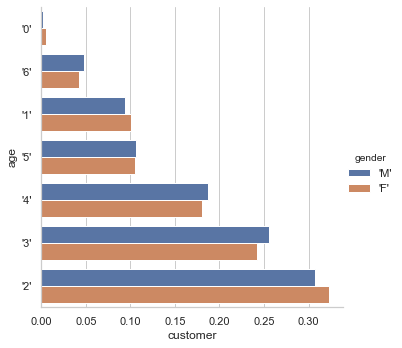

In [18]:
df_customer_per_age_and_gender = df_dataset.groupby(["age", "gender"]).count()["customer"].reset_index().sort_values(by="customer")

# Normalize by total number per gender
df_customer_per_age_and_gender.loc[df_customer_per_age_and_gender["gender"] == "'M'", "customer"] /= n_M
df_customer_per_age_and_gender.loc[df_customer_per_age_and_gender["gender"] == "'F'", "customer"] /= n_F 

g = sns.catplot(y="age", 
                x="customer",
                hue="gender", 
                data=df_customer_per_age_and_gender,
                kind="bar",
                orient="h")

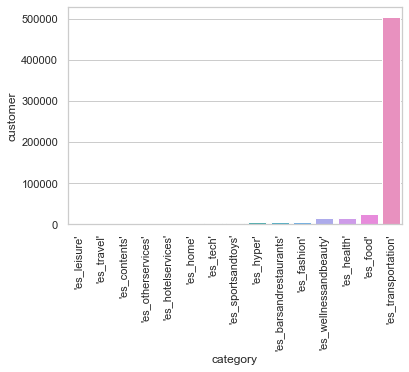

In [19]:
df_customer_per_category = df_dataset.groupby("category").count()["customer"].reset_index().sort_values(by="customer")
ax = sns.barplot(x="category", y="customer", data=df_customer_per_category)
plt.xticks(rotation=90)
plt.show()

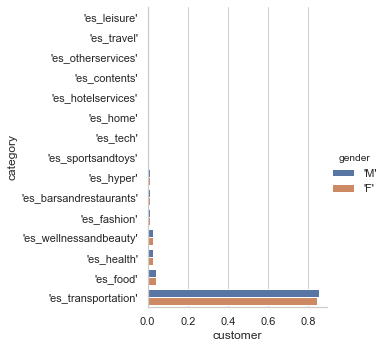

In [20]:
df_customer_per_category_and_gender = df_dataset.groupby(["category", "gender"]).count()["customer"].reset_index().sort_values(by="customer")
df_customer_per_category_and_gender = df_customer_per_category_and_gender.loc[df_customer_per_category_and_gender["gender"].isin(["'F'", "'M'"]), :]

# Normalize by total number per gender
df_customer_per_category_and_gender.loc[df_customer_per_category_and_gender["gender"] == "'M'", "customer"] /= n_M
df_customer_per_category_and_gender.loc[df_customer_per_category_and_gender["gender"] == "'F'", "customer"] /= n_F

g = sns.catplot(y="category", 
                x="customer", 
                hue="gender", 
                data=df_customer_per_category_and_gender,
                kind="bar",
                orient="h")

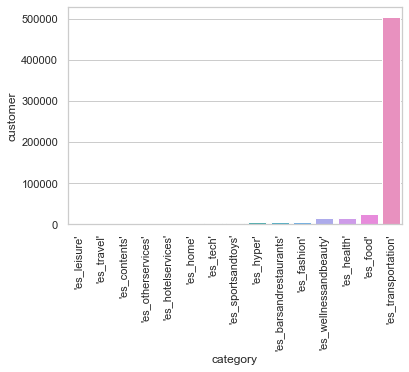

In [21]:
df_customer_per_category = df_dataset.groupby("category").count()["customer"].reset_index().sort_values(by="customer")
ax = sns.barplot(x="category", y="customer", data=df_customer_per_category)
plt.xticks(rotation=90)
plt.show()

In [22]:
df_dataset.groupby("category").mean()["amount"].reset_index().sort_values(by="amount")

,category,amount
12,'es_transportation',26.961113
3,'es_food',37.067651
0,'es_barsandrestaurants',43.509385
1,'es_contents',44.532713
7,'es_hyper',45.932486
14,'es_wellnessandbeauty',65.487074
2,'es_fashion',65.637592
11,'es_tech',120.754402
4,'es_health',135.715256
9,'es_otherservices',135.724143


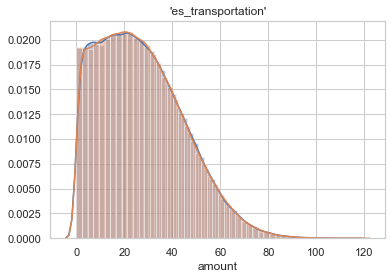

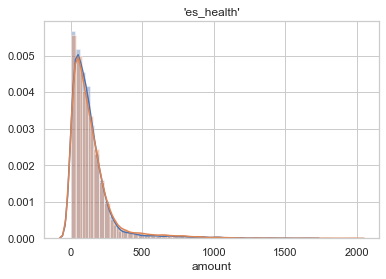

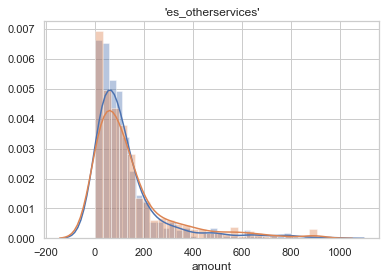

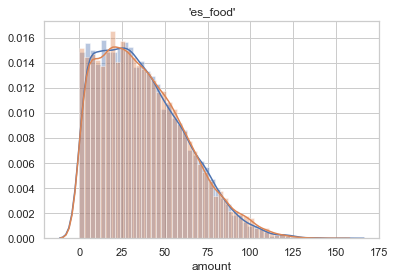

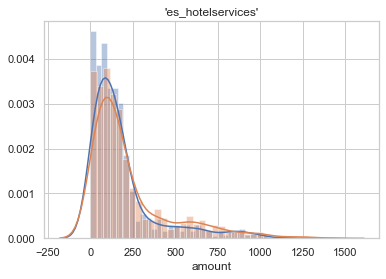

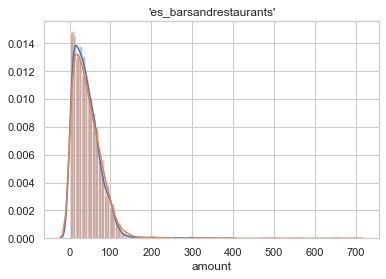

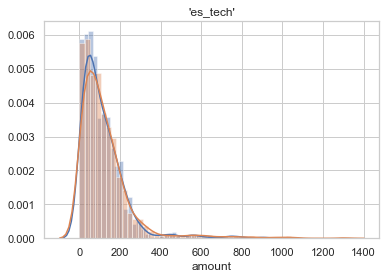

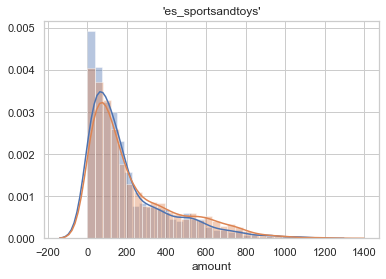

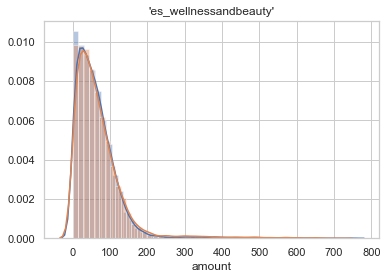

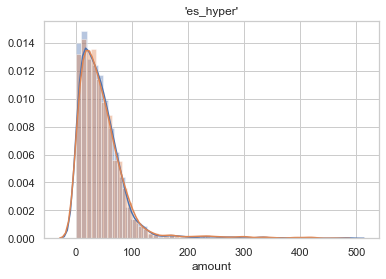

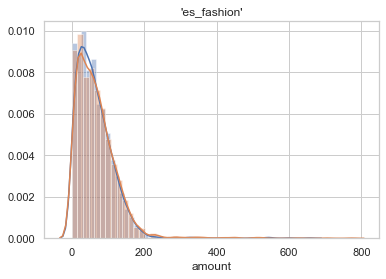

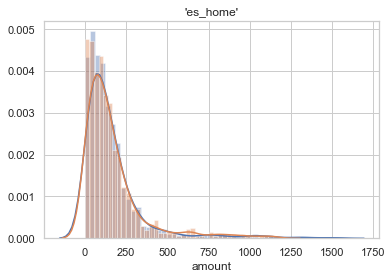

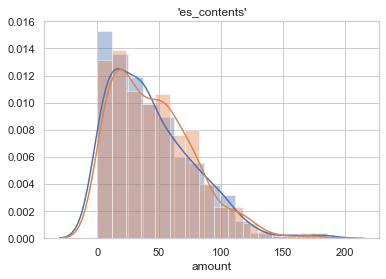

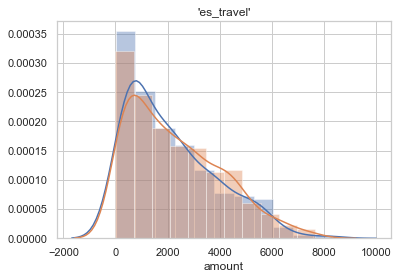

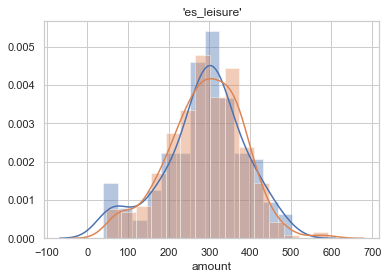

In [23]:
categories = df_dataset["category"].unique().tolist()
for category in categories:
    ax = sns.distplot(df_dataset.loc[(df_dataset["category"] == category) & (df_dataset["gender"] == "'M'"), :]["amount"], label="'M'")
    ax = sns.distplot(df_dataset.loc[(df_dataset["category"] == category) & (df_dataset["gender"] == "'F'"), :]["amount"], label="'F'")
    ax.set_title(category)
    plt.show()

In [24]:
df_dataset["zipMerchant"].unique()

array(["'28007'"], dtype=object)

In [25]:
df_dataset["merchant"].unique()

array(["'M348934600'", "'M1823072687'", "'M50039827'", "'M1888755466'",
       "'M1053599405'", "'M85975013'", "'M480139044'", "'M692898500'",
       "'M348875670'", "'M151143676'", "'M840466850'", "'M1741626453'",
       "'M1535107174'", "'M855959430'", "'M349281107'", "'M209847108'",
       "'M2122776122'", "'M1873032707'", "'M2011752106'", "'M857378720'",
       "'M1198415165'", "'M1748431652'", "'M980657600'", "'M1352454843'",
       "'M117188757'", "'M547558035'", "'M17379832'", "'M1649169323'",
       "'M1946091778'", "'M97925176'", "'M923029380'", "'M1353266412'",
       "'M1842530320'", "'M677738360'", "'M1313686961'", "'M732195782'",
       "'M1600850729'", "'M1872033263'", "'M3697346'", "'M495352832'",
       "'M1400236507'", "'M1294758098'", "'M1913465890'", "'M45060432'",
       "'M78078399'", "'M2080407379'", "'M1788569036'", "'M1416436880'",
       "'M933210764'", "'M1726401631'"], dtype=object)

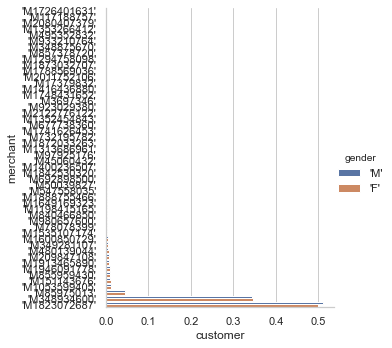

In [26]:
df_customer_per_merchant_and_gender = df_dataset.groupby(["merchant", "gender"]).count()["customer"].reset_index().sort_values(by="customer")
df_customer_per_merchant_and_gender = df_customer_per_merchant_and_gender.loc[df_customer_per_merchant_and_gender["gender"].isin(["'F'", "'M'"]), :]

# Normalize by total number per gender
df_customer_per_merchant_and_gender.loc[df_customer_per_merchant_and_gender["gender"] == "'M'", "customer"] /= n_M
df_customer_per_merchant_and_gender.loc[df_customer_per_merchant_and_gender["gender"] == "'F'", "customer"] /= n_F

g = sns.catplot(y="merchant",
                x="customer",
                hue="gender", 
                data=df_customer_per_merchant_and_gender,
                kind="bar",
                orient="h")

In [27]:
df_dataset

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [28]:
df_dataset.loc[:, "count"] = 1

/Users/damienmarlier/Documents/VNLife/vnlife/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/damienmarlier/Documents/VNLife/vnlife/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
df_dataset

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,count
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,1
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,1
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,1
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0,1
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0,1
...,...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0,1
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0,1
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0,1
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0,1


### Build features

In [30]:
merchants = df_dataset["merchant"].unique().tolist()
categories = df_dataset["category"].unique().tolist()

In [31]:
df_dataset.sort_values(by="customer", inplace=True)

/Users/damienmarlier/Documents/VNLife/vnlife/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_dataset

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,count
117326,42,'C1000148617','5','M','28007','M1888755466','28007','es_otherservices',56.18,0,1
230846,78,'C1000148617','5','M','28007','M1823072687','28007','es_transportation',25.90,0,1
564401,171,'C1000148617','5','M','28007','M1823072687','28007','es_transportation',56.41,0,1
278899,92,'C1000148617','5','M','28007','M1823072687','28007','es_transportation',51.02,0,1
531747,163,'C1000148617','5','M','28007','M1823072687','28007','es_transportation',37.08,0,1
...,...,...,...,...,...,...,...,...,...,...,...
194349,67,'C999723254','2','M','28007','M348934600','28007','es_transportation',21.40,0,1
138573,49,'C999723254','2','M','28007','M348934600','28007','es_transportation',19.26,0,1
225511,76,'C999723254','2','M','28007','M348934600','28007','es_transportation',8.31,0,1
420938,132,'C999723254','2','M','28007','M1823072687','28007','es_transportation',1.66,0,1


In [33]:
### Number of purchases per customer

In [34]:
df_count = df_dataset.groupby(["customer"]).count()[["count"]]

In [ ]:
### Get each customer's gender

In [ ]:
df_gender = df_dataset.drop_duplicates(["customer", "gender"], keep="first").set_index("customer")[["gender"]]

In [ ]:
### Get each customer's age

In [35]:
df_age = df_dataset.drop_duplicates(["customer", "age"], keep="first").set_index("customer")[["age"]]
df_age = pd.get_dummies(df_age, prefix=['age'])

In [36]:
df_amount = df_dataset.groupby(["customer"]).sum()[["amount"]]
df_mean_amount = df_dataset.groupby(["customer"]).mean()[["amount"]]
df_mean_amount.rename(columns={"amount": "mean_amount"}, inplace=True)
df_std_amount = df_dataset.groupby(["customer"]).std()[["amount"]]
df_std_amount.rename(columns={"amount": "std_amount"}, inplace=True)

In [37]:
### Number of Categories customer purchased from

In [38]:
df_count_category = df_dataset.drop_duplicates(["customer", "category"], keep="first").groupby(["customer"]).count()[["count"]]
df_count_category.rename(columns={"count": "count_category"}, inplace=True)

In [39]:
### Number of Merchants customer purchased from

In [40]:
df_count_merchant = df_dataset.drop_duplicates(["customer", "merchant"], keep="first").groupby(["customer"]).count()[["count"]]
df_count_merchant.rename(columns={"count": "count_merchant"}, inplace=True)

In [41]:
### Number of purchases per customer and merchant

In [42]:
df_count_per_merchant = df_dataset.groupby(["customer", "merchant"]).count().reset_index()[["customer", "merchant", "count"]]
df_count_per_merchant = pd.pivot_table(df_count_per_merchant, values=["count"], index=["customer"], columns=["merchant"])[["count"]]
df_count_per_merchant.columns = list(map("_".join, df_count_per_merchant.columns))
df_count_per_merchant.fillna(value=0, inplace=True)

In [43]:
### Amount of purchases per customer and merchant

In [44]:
df_amount_per_merchant = df_dataset.groupby(["customer", "merchant"]).sum().reset_index()[["customer", "merchant", "amount"]]
df_amount_per_merchant = pd.pivot_table(df_amount_per_merchant, values=["amount"], index=["customer"], columns=["merchant"])[["amount"]]
df_amount_per_merchant.columns = list(map("_".join, df_amount_per_merchant.columns))
df_amount_per_merchant.fillna(value=0, inplace=True)

In [45]:
df_mean_amount_per_merchant = df_dataset.groupby(["customer", "merchant"]).mean().reset_index()[["customer", "merchant", "amount"]]
df_mean_amount_per_merchant = pd.pivot_table(df_mean_amount_per_merchant, values=["amount"], index=["customer"], columns=["merchant"])[["amount"]]
df_mean_amount_per_merchant.rename(columns={"amount": "mean_amount"}, inplace=True)
df_mean_amount_per_merchant.columns = list(map("_".join, df_mean_amount_per_merchant.columns))
df_mean_amount_per_merchant.fillna(value=0, inplace=True)

In [46]:
df_std_amount_per_merchant = df_dataset.groupby(["customer", "merchant"]).std().reset_index()[["customer", "merchant", "amount"]]
df_std_amount_per_merchant = pd.pivot_table(df_std_amount_per_merchant, values=["amount"], index=["customer"], columns=["merchant"])[["amount"]]
df_std_amount_per_merchant.rename(columns={"amount": "std_amount"}, inplace=True)
df_std_amount_per_merchant.columns = list(map("_".join, df_std_amount_per_merchant.columns))
df_std_amount_per_merchant.fillna(value=0, inplace=True)

In [47]:
### Number of purchases per customer and category

In [48]:
df_count_per_category = df_dataset.groupby(["customer", "category"]).count().reset_index()[["customer", "category", "count"]]
df_count_per_category = pd.pivot_table(df_count_per_category, values=["count"], index=["customer"], columns=["category"])[["count"]]
df_count_per_category.columns = list(map("_".join, df_count_per_category.columns))
df_count_per_category.fillna(value=0, inplace=True)

In [49]:
### Amount of purchases per customer and category

In [50]:
df_amount_per_category = df_dataset.groupby(["customer", "category"]).sum().reset_index()[["customer", "category", "amount"]]
df_amount_per_category = pd.pivot_table(df_amount_per_category, values=["amount"], index=["customer"], columns=["category"])[["amount"]]
df_amount_per_category.columns = list(map("_".join, df_amount_per_category.columns))
df_amount_per_category.fillna(value=0, inplace=True)

In [51]:
df_mean_amount_per_category = df_dataset.groupby(["customer", "category"]).mean().reset_index()[["customer", "category", "amount"]]
df_mean_amount_per_category = pd.pivot_table(df_mean_amount_per_category, values=["amount"], index=["customer"], columns=["category"])[["amount"]]
df_mean_amount_per_category.rename(columns={"amount": "mean_amount"}, inplace=True)
df_mean_amount_per_category.columns = list(map("_".join, df_mean_amount_per_category.columns))
df_mean_amount_per_category.fillna(value=0, inplace=True)

In [52]:
df_std_amount_per_category = df_dataset.groupby(["customer", "category"]).std().reset_index()[["customer", "category", "amount"]]
df_std_amount_per_category = pd.pivot_table(df_std_amount_per_category, values=["amount"], index=["customer"], columns=["category"])[["amount"]]
df_std_amount_per_category.rename(columns={"amount": "std_amount"}, inplace=True)
df_std_amount_per_category.columns = list(map("_".join, df_std_amount_per_category.columns))
df_std_amount_per_category.fillna(value=0, inplace=True)

In [53]:
### Mean and Std for customer interpurchase time

In [54]:
df_customer_steps = df_dataset.drop_duplicates(["customer", "step"], keep="first")[["customer", "step"]].sort_values(by=["customer", "step"])
df_customer_steps["diff"] = df_customer_steps.groupby("customer")["step"].diff()
df_customer_steps.dropna(subset=["diff"], axis=0, inplace=True)

## Mean IPT
df_mean_ipt = df_customer_steps.groupby(["customer"]).mean()[["diff"]]
df_mean_ipt.rename(columns={"diff": "mean_ipt"}, inplace=True)
df_mean_ipt.fillna(value=180, inplace=True)

## Std IPT
df_std_ipt = df_customer_steps.groupby(["customer"]).std()[["diff"]]
df_std_ipt.rename(columns={"diff": "std_ipt"}, inplace=True)
df_std_ipt.fillna(value=0, inplace=True)

In [55]:
### Mean and Std for customer category interpurchase time

In [56]:
df_customer_category_steps = df_dataset.drop_duplicates(["customer", "step", "category"], keep="first")[["customer", "step", "category"]].sort_values(by=["customer", "step", "category"])
df_customer_category_steps["diff"] = df_customer_category_steps.groupby(["customer", "category"])["step"].diff()
df_customer_category_steps.dropna(subset=["diff"], axis=0, inplace=True)

In [57]:
df_mean_category_ipt = df_customer_category_steps.groupby(["customer", "category"]).mean().reset_index()[["customer", "category", "diff"]]
df_mean_category_ipt.rename(columns={"diff": "mean_ipt"}, inplace=True)
df_mean_category_ipt = pd.pivot_table(df_mean_category_ipt, values=["mean_ipt"], index=["customer"], columns=["category"])
df_mean_category_ipt.columns = list(map("_".join, df_mean_category_ipt.columns))
df_mean_category_ipt.fillna(value=180, inplace=True)

In [58]:
df_std_category_ipt = df_customer_category_steps.groupby(["customer", "category"]).std().reset_index()[["customer", "category", "diff"]]
df_std_category_ipt.rename(columns={"diff": "std_ipt"}, inplace=True)
df_std_category_ipt = pd.pivot_table(df_std_category_ipt, values=["std_ipt"], index=["customer"], columns=["category"])
df_std_category_ipt.columns = list(map("_".join, df_std_category_ipt.columns))
df_std_category_ipt.fillna(value=0, inplace=True)

In [59]:
### Mean and Std for customer merchant interpurchase time

In [60]:
df_customer_merchant_steps = df_dataset.drop_duplicates(["customer", "step", "merchant"], keep="first")[["customer", "step", "merchant"]].sort_values(by=["customer", "step", "merchant"])
df_customer_merchant_steps["diff"] = df_customer_merchant_steps.groupby(["customer", "merchant"])["step"].diff()
df_customer_merchant_steps.dropna(subset=["diff"], axis=0, inplace=True)

In [61]:
df_mean_merchant_ipt = df_customer_merchant_steps.groupby(["customer", "merchant"]).mean().reset_index()[["customer", "merchant", "diff"]]
df_mean_merchant_ipt.rename(columns={"diff": "mean_ipt"}, inplace=True)
df_mean_merchant_ipt = pd.pivot_table(df_mean_merchant_ipt, values=["mean_ipt"], index=["customer"], columns=["merchant"])
df_mean_merchant_ipt.columns = list(map("_".join, df_mean_merchant_ipt.columns))
df_mean_merchant_ipt.fillna(value=180, inplace=True)

In [62]:
df_std_merchant_ipt = df_customer_merchant_steps.groupby(["customer", "merchant"]).std().reset_index()[["customer", "merchant", "diff"]]
df_std_merchant_ipt.rename(columns={"diff": "std_ipt"}, inplace=True)
df_std_merchant_ipt = pd.pivot_table(df_std_merchant_ipt, values=["std_ipt"], index=["customer"], columns=["merchant"])
df_std_merchant_ipt.columns = list(map("_".join, df_std_merchant_ipt.columns))
df_std_merchant_ipt.fillna(value=0, inplace=True)

In [63]:
### Concatenate all features

In [64]:
df_features = pd.concat([df_gender,
                         df_age,
                         df_count,
                         df_amount,
                         df_mean_amount,
                         df_std_amount,
                         df_mean_ipt,
                         df_std_ipt,
                         df_count_category,
                         df_count_per_category,
                         df_amount_per_category,
                         df_mean_amount_per_category,
                         df_std_amount_per_category,
                         df_mean_category_ipt,
                         df_std_category_ipt,
                         df_count_merchant,
                         df_count_per_merchant,
                         df_amount_per_merchant,
                         df_mean_amount_per_merchant,
                         df_std_amount_per_merchant,
                         df_mean_merchant_ipt,
                         df_std_merchant_ipt], 
                         axis=1,
                         sort=True)

In [65]:
df_amount_per_merchant.fillna(value=0, inplace=True)
df_amount_per_merchant.fillna(value=0, inplace=True)
df_amount_per_merchant.fillna(value=0, inplace=True)

In [66]:
count_category_columns = ["count_{}".format(category) for category in categories]
amount_category_columns = ["amount_{}".format(category) for category in categories]
count_merchant_columns = ["count_{}".format(merchant) for merchant in merchants]
amount_merchant_columns = ["amount_{}".format(merchant) for merchant in merchants]

mean_ipt_category_columns = ["mean_ipt_{}".format(category) for category in categories]
std_ipt_category_columns = ["std_ipt_{}".format(category) for category in categories]

mean_ipt_merchant_columns = ["mean_ipt_{}".format(merchant) for merchant in merchants]
std_ipt_merchant_columns = ["std_ipt_{}".format(merchant) for merchant in merchants]

std_amount_merchant_columns = ["std_amount_{}".format(merchant) for merchant in merchants]

normalized_count_category_columns = ["ncount_{}".format(category) for category in categories]
normalized_amount_category_columns = ["namount_{}".format(category) for category in categories]
normalized_count_merchant_columns = ["ncount_{}".format(merchant) for merchant in merchants]
normalized_amount_merchant_columns = ["namount_{}".format(merchant) for merchant in merchants]

In [67]:
# Filling missing values
df_features[[column for column in df_features.columns.tolist() if column in mean_ipt_category_columns]] = df_features[[column for column in df_features.columns.tolist() if column in mean_ipt_category_columns]].fillna(180)
df_features[[column for column in df_features.columns.tolist() if column in mean_ipt_merchant_columns]] = df_features[[column for column in df_features.columns.tolist() if column in mean_ipt_merchant_columns]].fillna(180) 
df_features[[column for column in df_features.columns.tolist() if column in std_ipt_category_columns]] = df_features[[column for column in df_features.columns.tolist() if column in std_ipt_category_columns]].fillna(0)
df_features[[column for column in df_features.columns.tolist() if column in std_ipt_merchant_columns]] = df_features[[column for column in df_features.columns.tolist() if column in std_ipt_merchant_columns]].fillna(0)
df_features[[column for column in df_features.columns.tolist() if column in std_amount_merchant_columns]] = df_features[[column for column in df_features.columns.tolist() if column in std_amount_merchant_columns]].fillna(0)

In [68]:
df_features[[column for column in df_features.columns.tolist() if column in mean_ipt_category_columns]]

,mean_ipt_'es_barsandrestaurants',mean_ipt_'es_contents',mean_ipt_'es_fashion',mean_ipt_'es_food',mean_ipt_'es_health',mean_ipt_'es_home',mean_ipt_'es_hotelservices',mean_ipt_'es_hyper',mean_ipt_'es_leisure',mean_ipt_'es_otherservices',mean_ipt_'es_sportsandtoys',mean_ipt_'es_tech',mean_ipt_'es_transportation',mean_ipt_'es_travel',mean_ipt_'es_wellnessandbeauty'
'C1000148617',180.0,180.0,180.0,29.750000,71.000000,180.0,180.0,180.000000,180.0,12.0,180.00,107.0,1.216216,180.0,9.000000
'C100045114',103.0,180.0,180.0,5.000000,32.600000,14.0,50.0,22.000000,180.0,180.0,30.00,180.0,2.918033,180.0,18.000000
'C1000699316',180.0,180.0,180.0,11.000000,180.000000,180.0,180.0,180.000000,180.0,180.0,180.00,180.0,1.164557,180.0,50.500000
'C1001065306',180.0,180.0,180.0,180.000000,13.666667,180.0,180.0,180.000000,180.0,180.0,27.25,180.0,180.000000,180.0,30.333333
'C1002658784',78.0,180.0,88.0,7.000000,9.000000,180.0,180.0,22.000000,180.0,180.0,42.00,180.0,1.320755,180.0,27.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'C99729647',180.0,180.0,180.0,19.000000,125.000000,180.0,180.0,180.000000,180.0,180.0,180.00,69.0,1.202703,180.0,4.333333
'C998690782',20.5,180.0,180.0,23.000000,180.000000,180.0,180.0,11.000000,180.0,180.0,180.00,180.0,1.163399,1.0,180.000000
'C998987490',180.0,180.0,180.0,11.500000,32.000000,180.0,180.0,180.000000,180.0,180.0,180.00,180.0,1.210884,180.0,180.000000
'C999393223',180.0,180.0,180.0,3.800000,71.500000,180.0,180.0,45.666667,180.0,180.0,180.00,180.0,1.308411,180.0,20.666667


In [69]:
assert(df_features[count_category_columns].sum(axis=1).sum() == df_features["count"].sum())
assert(df_features[count_merchant_columns].sum(axis=1).sum() == df_features["count"].sum())
assert(df_features[amount_category_columns].sum(axis=1).sum() == df_features["amount"].sum())
assert(df_features[amount_merchant_columns].sum(axis=1).sum() == df_features["amount"].sum())

In [70]:
df_features[count_category_columns]

,count_'es_transportation',count_'es_health',count_'es_otherservices',count_'es_food',count_'es_hotelservices',count_'es_barsandrestaurants',count_'es_tech',count_'es_sportsandtoys',count_'es_wellnessandbeauty',count_'es_hyper',count_'es_fashion',count_'es_home',count_'es_contents',count_'es_travel',count_'es_leisure'
'C1000148617',114.0,2.0,2.0,5.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
'C100045114',65.0,10.0,0.0,4.0,2.0,2.0,0.0,3.0,17.0,2.0,1.0,2.0,0.0,1.0,0.0
'C1000699316',80.0,1.0,1.0,6.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
'C1001065306',0.0,16.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0
'C1002658784',108.0,3.0,1.0,3.0,0.0,2.0,1.0,2.0,3.0,4.0,2.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'C99729647',153.0,3.0,0.0,7.0,0.0,1.0,4.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
'C998690782',155.0,1.0,0.0,2.0,0.0,5.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0
'C998987490',150.0,11.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
'C999393223',109.0,4.0,0.0,6.0,0.0,1.0,0.0,1.0,16.0,4.0,0.0,1.0,0.0,0.0,0.0


In [71]:
df_features["count"]

'C1000148617'    131
'C100045114'     109
'C1000699316'     94
'C1001065306'     30
'C1002658784'    131
                ... 
'C99729647'      175
'C998690782'     171
'C998987490'     177
'C999393223'     142
'C999723254'     122
Name: count, Length: 4100, dtype: int64

In [72]:
# Normalize some features to make them easier to compare accross customers

In [73]:
df_features[normalized_count_category_columns] = df_features[count_category_columns].div(df_features["count"], axis=0)
df_features[normalized_amount_category_columns] = df_features[amount_category_columns].div(df_features["amount"], axis=0)
df_features[normalized_count_merchant_columns] = df_features[count_merchant_columns].div(df_features["count"], axis=0)
df_features[normalized_amount_merchant_columns] = df_features[amount_merchant_columns].div(df_features["amount"], axis=0)

In [74]:
assert(df_features[normalized_count_category_columns].sum(axis=1).sum() == df_features.shape[0])
assert(df_features[normalized_amount_category_columns].sum(axis=1).sum() == df_features.shape[0])
assert(df_features[normalized_count_merchant_columns].sum(axis=1).sum() == df_features.shape[0])
assert(df_features[normalized_amount_merchant_columns].sum(axis=1).sum() == df_features.shape[0])

In [75]:
df_features.drop(columns=count_category_columns, inplace=True)
df_features.drop(columns=amount_category_columns, inplace=True)
df_features.drop(columns=count_merchant_columns, inplace=True)
df_features.drop(columns=amount_merchant_columns, inplace=True)

In [76]:
df_features.columns.tolist()

['gender',
 "age_'0'",
 "age_'1'",
 "age_'2'",
 "age_'3'",
 "age_'4'",
 "age_'5'",
 "age_'6'",
 'count',
 'amount',
 'mean_amount',
 'std_amount',
 'mean_ipt',
 'std_ipt',
 'count_category',
 "mean_amount_'es_barsandrestaurants'",
 "mean_amount_'es_contents'",
 "mean_amount_'es_fashion'",
 "mean_amount_'es_food'",
 "mean_amount_'es_health'",
 "mean_amount_'es_home'",
 "mean_amount_'es_hotelservices'",
 "mean_amount_'es_hyper'",
 "mean_amount_'es_leisure'",
 "mean_amount_'es_otherservices'",
 "mean_amount_'es_sportsandtoys'",
 "mean_amount_'es_tech'",
 "mean_amount_'es_transportation'",
 "mean_amount_'es_travel'",
 "mean_amount_'es_wellnessandbeauty'",
 "std_amount_'es_barsandrestaurants'",
 "std_amount_'es_contents'",
 "std_amount_'es_fashion'",
 "std_amount_'es_food'",
 "std_amount_'es_health'",
 "std_amount_'es_home'",
 "std_amount_'es_hotelservices'",
 "std_amount_'es_hyper'",
 "std_amount_'es_leisure'",
 "std_amount_'es_otherservices'",
 "std_amount_'es_sportsandtoys'",
 "std_amoun

In [78]:
df_features

,gender,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',count,amount,...,namount_'M1400236507',namount_'M1294758098',namount_'M1913465890',namount_'M45060432',namount_'M78078399',namount_'M2080407379',namount_'M1788569036',namount_'M1416436880',namount_'M933210764',namount_'M1726401631'
'C1000148617',0,0,0,0,0,0,1,0,131,4597.04,...,0.029184,0.0,0.000000,0.026702,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C100045114',0,0,0,0,0,1,0,0,109,9846.65,...,0.000000,0.0,0.027590,0.000000,0.024125,0.0,0.020922,0.000000,0.0,0.0
'C1000699316',0,0,0,0,0,1,0,0,94,3586.56,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C1001065306',0,0,1,0,0,0,0,0,30,6142.64,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C1002658784',0,0,0,0,1,0,0,0,131,4487.18,...,0.026253,0.0,0.009908,0.000000,0.014281,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'C99729647',0,0,0,0,1,0,0,0,175,5697.26,...,0.034113,0.0,0.023862,0.000000,0.000000,0.0,0.000000,0.012346,0.0,0.0
'C998690782',0,0,0,1,0,0,0,0,171,10467.19,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C998987490',1,0,0,1,0,0,0,0,177,5712.34,...,0.000000,0.0,0.099311,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C999393223',1,0,1,0,0,0,0,0,142,5114.69,...,0.000000,0.0,0.040438,0.000000,0.018902,0.0,0.000000,0.000000,0.0,0.0


In [79]:
df_gender

,gender
customer,
'C1000148617','M'
'C100045114','M'
'C1000699316','M'
'C1001065306','M'
'C1002658784','M'
...,...
'C99729647','M'
'C998690782','M'
'C998987490','F'


In [80]:
df_features

,gender,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',count,amount,...,namount_'M1400236507',namount_'M1294758098',namount_'M1913465890',namount_'M45060432',namount_'M78078399',namount_'M2080407379',namount_'M1788569036',namount_'M1416436880',namount_'M933210764',namount_'M1726401631'
'C1000148617',0,0,0,0,0,0,1,0,131,4597.04,...,0.029184,0.0,0.000000,0.026702,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C100045114',0,0,0,0,0,1,0,0,109,9846.65,...,0.000000,0.0,0.027590,0.000000,0.024125,0.0,0.020922,0.000000,0.0,0.0
'C1000699316',0,0,0,0,0,1,0,0,94,3586.56,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C1001065306',0,0,1,0,0,0,0,0,30,6142.64,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C1002658784',0,0,0,0,1,0,0,0,131,4487.18,...,0.026253,0.0,0.009908,0.000000,0.014281,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'C99729647',0,0,0,0,1,0,0,0,175,5697.26,...,0.034113,0.0,0.023862,0.000000,0.000000,0.0,0.000000,0.012346,0.0,0.0
'C998690782',0,0,0,1,0,0,0,0,171,10467.19,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C998987490',1,0,0,1,0,0,0,0,177,5712.34,...,0.000000,0.0,0.099311,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C999393223',1,0,1,0,0,0,0,0,142,5114.69,...,0.000000,0.0,0.040438,0.000000,0.018902,0.0,0.000000,0.000000,0.0,0.0


In [81]:
[column for column in df_features.columns.tolist() if column in std_ipt_category_columns]

["std_ipt_'es_barsandrestaurants'",
 "std_ipt_'es_contents'",
 "std_ipt_'es_fashion'",
 "std_ipt_'es_food'",
 "std_ipt_'es_health'",
 "std_ipt_'es_home'",
 "std_ipt_'es_hotelservices'",
 "std_ipt_'es_hyper'",
 "std_ipt_'es_leisure'",
 "std_ipt_'es_otherservices'",
 "std_ipt_'es_sportsandtoys'",
 "std_ipt_'es_tech'",
 "std_ipt_'es_transportation'",
 "std_ipt_'es_travel'",
 "std_ipt_'es_wellnessandbeauty'"]

In [82]:
gender_corr = df_features.corr()["gender"].sort_values()

In [86]:
gender_corr.sort_values().tolist()

[-0.04872477420559703,
 -0.04691886897260009,
 -0.04341509223329505,
 -0.04299597151240088,
 -0.041929697579423886,
 -0.0392158541530535,
 -0.03818396963679578,
 -0.03813801893062858,
 -0.037756992957811986,
 -0.03711510843437322,
 -0.03703266844285609,
 -0.03630205134890666,
 -0.03593465257466641,
 -0.03582109171175232,
 -0.035531930491107706,
 -0.03467024928957075,
 -0.033459929107461546,
 -0.03322887568146252,
 -0.03321556318924944,
 -0.032714888445768406,
 -0.03143082932003937,
 -0.03082955950003543,
 -0.030355640241365507,
 -0.03013962407226633,
 -0.030012322295605198,
 -0.029473368772318712,
 -0.02816957923465495,
 -0.02750691969323603,
 -0.027209845171283716,
 -0.02665840986321887,
 -0.026600588844068997,
 -0.02658321414811994,
 -0.02636040589329327,
 -0.026353309224570905,
 -0.025798042791220648,
 -0.02520045055083411,
 -0.024695456742626277,
 -0.02357588462246216,
 -0.023156049610788237,
 -0.022656929880481777,
 -0.02231309536613956,
 -0.021986115961675275,
 -0.021500363760329

In [ ]:
### Look at how target variable (gender) correlate with features

In [87]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(gender_corr.abs().sort_values())

namount_'es_travel'                    0.000094
mean_ipt_'M1400236507'                 0.000131
std_amount_'M1649169323'               0.000263
namount_'M855959430'                   0.000282
namount_'es_hyper'                     0.000282
mean_amount_'es_travel'                0.000388
std_amount_'M1053599405'               0.000423
mean_amount_'es_hyper'                 0.000439
mean_amount_'M855959430'               0.000439
ncount_'M2080407379'                   0.000506
namount_'M732195782'                   0.000611
std_amount_'M1400236507'               0.000629
mean_amount_'M45060432'                0.000649
namount_'M857378720'                   0.000700
mean_ipt_'M1600850729'                 0.000764
namount_'M2122776122'                  0.000807
mean_ipt_'M97925176'                   0.000863
std_ipt_'M855959430'                   0.000950
std_ipt_'es_hyper'                     0.000950
ncount_'M348934600'                    0.001010
std_amount_'M349281107'                0

In [88]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_features.isna().sum(axis=0))

gender                                 0
age_'0'                                0
age_'1'                                0
age_'2'                                0
age_'3'                                0
age_'4'                                0
age_'5'                                0
age_'6'                                0
count                                  0
amount                                 0
mean_amount                            0
std_amount                             0
mean_ipt                               0
std_ipt                                0
count_category                         0
mean_amount_'es_barsandrestaurants'    0
mean_amount_'es_contents'              0
mean_amount_'es_fashion'               0
mean_amount_'es_food'                  0
mean_amount_'es_health'                0
mean_amount_'es_home'                  0
mean_amount_'es_hotelservices'         0
mean_amount_'es_hyper'                 0
mean_amount_'es_leisure'               0
mean_amount_'es_

In [89]:
df_features

,gender,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',count,amount,...,namount_'M1400236507',namount_'M1294758098',namount_'M1913465890',namount_'M45060432',namount_'M78078399',namount_'M2080407379',namount_'M1788569036',namount_'M1416436880',namount_'M933210764',namount_'M1726401631'
'C1000148617',0,0,0,0,0,0,1,0,131,4597.04,...,0.029184,0.0,0.000000,0.026702,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C100045114',0,0,0,0,0,1,0,0,109,9846.65,...,0.000000,0.0,0.027590,0.000000,0.024125,0.0,0.020922,0.000000,0.0,0.0
'C1000699316',0,0,0,0,0,1,0,0,94,3586.56,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C1001065306',0,0,1,0,0,0,0,0,30,6142.64,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C1002658784',0,0,0,0,1,0,0,0,131,4487.18,...,0.026253,0.0,0.009908,0.000000,0.014281,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'C99729647',0,0,0,0,1,0,0,0,175,5697.26,...,0.034113,0.0,0.023862,0.000000,0.000000,0.0,0.000000,0.012346,0.0,0.0
'C998690782',0,0,0,1,0,0,0,0,171,10467.19,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C998987490',1,0,0,1,0,0,0,0,177,5712.34,...,0.000000,0.0,0.099311,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C999393223',1,0,1,0,0,0,0,0,142,5114.69,...,0.000000,0.0,0.040438,0.000000,0.018902,0.0,0.000000,0.000000,0.0,0.0


In [90]:
df_features

,gender,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',count,amount,...,namount_'M1400236507',namount_'M1294758098',namount_'M1913465890',namount_'M45060432',namount_'M78078399',namount_'M2080407379',namount_'M1788569036',namount_'M1416436880',namount_'M933210764',namount_'M1726401631'
'C1000148617',0,0,0,0,0,0,1,0,131,4597.04,...,0.029184,0.0,0.000000,0.026702,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C100045114',0,0,0,0,0,1,0,0,109,9846.65,...,0.000000,0.0,0.027590,0.000000,0.024125,0.0,0.020922,0.000000,0.0,0.0
'C1000699316',0,0,0,0,0,1,0,0,94,3586.56,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C1001065306',0,0,1,0,0,0,0,0,30,6142.64,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C1002658784',0,0,0,0,1,0,0,0,131,4487.18,...,0.026253,0.0,0.009908,0.000000,0.014281,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'C99729647',0,0,0,0,1,0,0,0,175,5697.26,...,0.034113,0.0,0.023862,0.000000,0.000000,0.0,0.000000,0.012346,0.0,0.0
'C998690782',0,0,0,1,0,0,0,0,171,10467.19,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C998987490',1,0,0,1,0,0,0,0,177,5712.34,...,0.000000,0.0,0.099311,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
'C999393223',1,0,1,0,0,0,0,0,142,5114.69,...,0.000000,0.0,0.040438,0.000000,0.018902,0.0,0.000000,0.000000,0.0,0.0


In [97]:
import ppscore as pps
pps_scores = []
for feature in FEATURE_COLUMNS:
    pps_scores.append({"feature": feature,
                       "ppscore": pps.score(df_features, feature, "gender")["ppscore"]})
df_pps_score = pd.DataFrame.from_dict(pps_scores)

In [98]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_pps_score.sort_values(by="ppscore", ascending=False))

                                 feature   ppscore
9                            mean_amount  0.212695
28    mean_amount_'es_wellnessandbeauty'  0.211710
245                 std_ipt_'M348934600'  0.211105
47                    mean_ipt_'es_food'  0.208508
216                 mean_ipt_'M85975013'  0.208508
43     std_amount_'es_wellnessandbeauty'  0.208174
118             mean_amount_'M855959430'  0.206705
21                mean_amount_'es_hyper'  0.206705
154              std_amount_'M348934600'  0.205509
321                 ncount_'M1946091778'  0.204956
10                            std_amount  0.202139
190               mean_ipt_'M1823072687'  0.202043
298                   ncount_'M85975013'  0.201753
266                     ncount_'es_food'  0.201753
105             mean_amount_'M348934600'  0.199311
26       mean_amount_'es_transportation'  0.199264
348                  namount_'M85975013'  0.199258
281                    namount_'es_food'  0.199258
73        std_ipt_'es_wellnessa

In [155]:
best_pps_features = df_pps_score.sort_values(by=["ppscore"], ascending=False).iloc[1:10, :]["feature"].tolist()

In [160]:
best_pps_features

["mean_amount_'es_wellnessandbeauty'",
 "std_ipt_'M348934600'",
 "mean_ipt_'es_food'",
 "mean_ipt_'M85975013'",
 "std_amount_'es_wellnessandbeauty'",
 "mean_amount_'M855959430'",
 "mean_amount_'es_hyper'",
 "std_amount_'M348934600'",
 "ncount_'M1946091778'"]

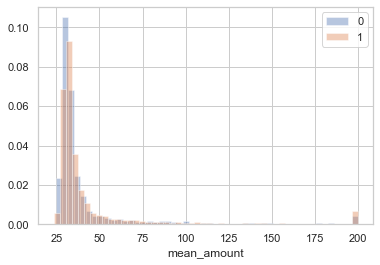

In [161]:
sns.distplot(df_features.loc[df_features["gender"] == 0, "mean_amount"].clip(upper=200), label=0, kde=False, norm_hist=True)
sns.distplot(df_features.loc[df_features["gender"] == 1, "mean_amount"].clip(upper=200), label=1, kde=False, norm_hist=True)
plt.legend()

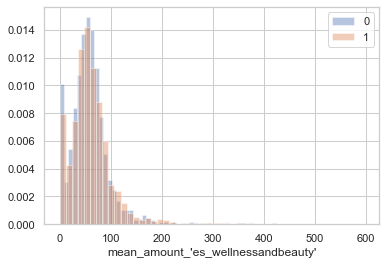

In [162]:
sns.distplot(df_features.loc[df_features["gender"] == 0, "mean_amount_'es_wellnessandbeauty'"], label=0, kde=False, norm_hist=True)
sns.distplot(df_features.loc[df_features["gender"] == 1, "mean_amount_'es_wellnessandbeauty'"], label=1, kde=False, norm_hist=True)
plt.legend()

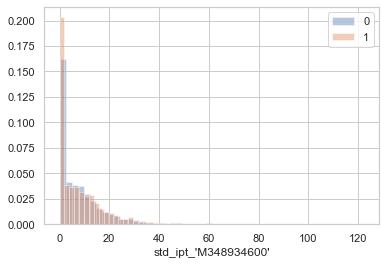

In [163]:
sns.distplot(df_features.loc[df_features["gender"] == 0, "std_ipt_'M348934600'"], label=0, kde=False, norm_hist=True)
sns.distplot(df_features.loc[df_features["gender"] == 1, "std_ipt_'M348934600'"], label=1, kde=False, norm_hist=True)
plt.legend()

In [164]:
df_X = df_features[best_pps_features]
df_X = (df_X - df_X.mean(axis=0)) / df_X.std(axis=0)
X_embedded = TSNE(n_components=2).fit_transform(df_X.values)
Y = df_Y.values

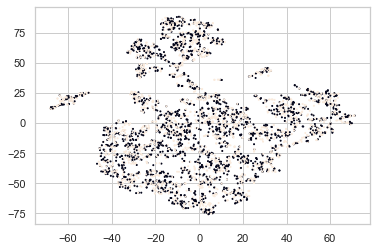

In [166]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=1, c=Y)
plt.

In [167]:
best_pps_features

["mean_amount_'es_wellnessandbeauty'",
 "std_ipt_'M348934600'",
 "mean_ipt_'es_food'",
 "mean_ipt_'M85975013'",
 "std_amount_'es_wellnessandbeauty'",
 "mean_amount_'M855959430'",
 "mean_amount_'es_hyper'",
 "std_amount_'M348934600'",
 "ncount_'M1946091778'"]

In [188]:
### Look at RFM

In [189]:
T = df.groupby("customer")[["step"]].max()
recency = T - df.groupby("customer")[["step"]].min()
monetary = df.groupby(["customer", "step"])[["amount"]].mean() \
                                                       .reset_index() \
                                                       .groupby("customer")[["amount"]] \
                                                       .mean()
frequency = df.drop_duplicates(subset=["customer", "step"],
                               keep="first").groupby(["customer"]) \
                                            .count() - 1

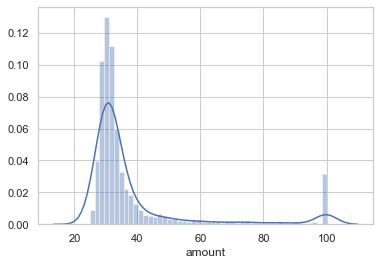

In [190]:
sns.distplot(monetary["amount"].clip(upper=100))

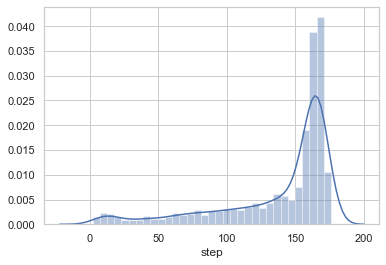

In [191]:
sns.distplot(frequency["step"])

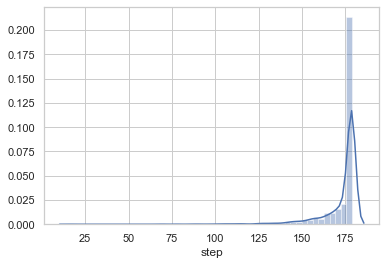

In [192]:
sns.distplot(recency["step"])

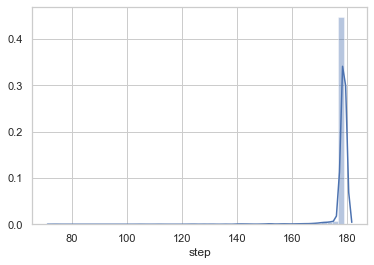

In [193]:
sns.distplot(T["step"])